In [87]:
#colorado_data - confirmed cases- weekly
#colorado_data1 - deaths in colorado - weekly
#date_confirmed - dataset with date and #Confirmed cases colorado
#date_deaths - dataset with date and death cases colorado
#date_confirmed_denver - dataset with date and confirmed cases in Denver
#date_deaths_denver - dataset with date and death cases in denver


In [88]:
import numpy as np 
import matplotlib.pyplot as plt 
import matplotlib.colors as mcolors
import pandas as pd 
import random
import math
import time
from datetime import datetime
import datetime
import operator 
import seaborn as sns
%matplotlib inline

In [89]:
confirmed_df = pd.read_csv('https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_confirmed_US.csv')
deaths_df = pd.read_csv('https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_deaths_US.csv')
recovered_df = pd.read_csv('https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_recovered_global.csv')
latest_data = pd.read_csv('https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_daily_reports/03-29-2020.csv')


In [90]:
denver_crime = pd.read_csv('crime.csv')
offense_codes = pd.read_csv('offense_codes.csv')

In [91]:
#dropping irrelevant columns
confirmed_df.head()
data=confirmed_df.drop(['UID', 'code3', 'FIPS', 'Lat', 'Long_','Combined_Key','iso2','iso3'], axis=1)


In [93]:
#Obtaining the data for just Colorado
colorado_data = data.loc[data['Province_State'] == 'Colorado']
colorado_data


,Admin2,Province_State,Country_Region,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,...,5/2/20,5/3/20,5/4/20,5/5/20,5/6/20,5/7/20,5/8/20,5/9/20,5/10/20,5/11/20
249,Adams,Colorado,US,0,0,0,0,0,0,0,...,1730,1780,1815,1883,1952,2046,2117,2205,2242,2278
250,Alamosa,Colorado,US,0,0,0,0,0,0,0,...,11,12,14,14,22,25,25,25,25,32
251,Arapahoe,Colorado,US,0,0,0,0,0,0,0,...,2625,2706,2758,2883,2977,3089,3148,3228,3272,3313
252,Archuleta,Colorado,US,0,0,0,0,0,0,0,...,8,8,8,8,8,8,8,8,8,8
253,Baca,Colorado,US,0,0,0,0,0,0,0,...,10,12,12,12,12,12,12,12,12,12
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
310,Washington,Colorado,US,0,0,0,0,0,0,0,...,8,8,8,9,9,9,9,9,9,9
311,Weld,Colorado,US,0,0,0,0,0,0,0,...,1836,1872,1897,1955,1988,2042,2087,2120,2139,2159
312,Yuma,Colorado,US,0,0,0,0,0,0,0,...,8,9,9,9,9,10,10,10,11,11
3154,Out of CO,Colorado,US,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [94]:
#Table with county name and total number of confirmed cases till May 7th in Colorado
data_df = colorado_data[['Admin2','Province_State','5/7/20']]
data_df
data_df.set_index('Admin2', inplace=True)


In [95]:
#dropping irrelevant columns in deaths data
data1=deaths_df.drop(['UID', 'code3', 'FIPS', 'Lat', 'Long_','Combined_Key','iso2','iso3','Population'], axis=1)


In [96]:
#Obtaining the deaths data for just Colorado State
colorado_data1 = data1.loc[data['Province_State'] == 'Colorado']
colorado_data1

,Admin2,Province_State,Country_Region,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,...,5/2/20,5/3/20,5/4/20,5/5/20,5/6/20,5/7/20,5/8/20,5/9/20,5/10/20,5/11/20
249,Adams,Colorado,US,0,0,0,0,0,0,0,...,68,68,68,72,75,78,80,81,81,81
250,Alamosa,Colorado,US,0,0,0,0,0,0,0,...,2,2,2,2,2,2,2,2,2,2
251,Arapahoe,Colorado,US,0,0,0,0,0,0,0,...,153,156,157,165,167,172,177,176,176,179
252,Archuleta,Colorado,US,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
253,Baca,Colorado,US,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
310,Washington,Colorado,US,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
311,Weld,Colorado,US,0,0,0,0,0,0,0,...,100,100,102,107,109,113,113,113,113,114
312,Yuma,Colorado,US,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3154,Out of CO,Colorado,US,0,0,0,0,0,0,0,...,2,2,2,2,2,2,2,2,2,1


In [97]:
#Countywise death cases in Colorado till May 7th
data_df1 = colorado_data1[['Admin2','Province_State','5/7/20']]

data_df1.set_index('Admin2', inplace=True)

In [98]:
#Result table of county wise confirmed and death cases in Colorado
result = pd.merge(data_df, data_df1, on='Admin2')
result1 = result.drop(['Province_State_x'],axis=1)
result2 = result1.rename(columns={"5/7/20_x": "Confirmed", "5/7/20_y": "Deaths", "Province_State_y": "State"})
result2

,Confirmed,State,Deaths
Admin2,,,
Adams,2046,Colorado,78
Alamosa,25,Colorado,2
Arapahoe,3089,Colorado,172
Archuleta,8,Colorado,0
Baca,12,Colorado,0
...,...,...,...
Washington,9,Colorado,0
Weld,2042,Colorado,113
Yuma,10,Colorado,0


Text(0.5, 1.0, 'Top 10 Counties in Colorado with most number of confirmed COVID19 Cases')

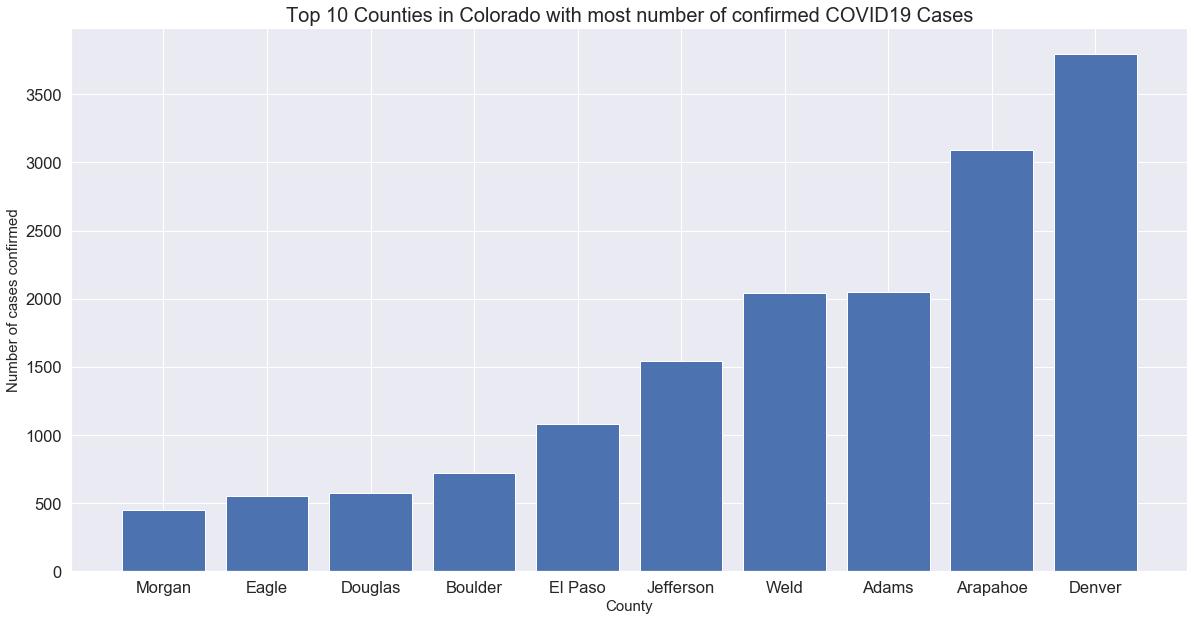

In [99]:
#Top 10 counties with most number of confirmed cases in Colorado
#Denver tops the chart
fig = plt.figure(figsize=(20,10))
plt.bar(result2.sort_values('Confirmed')["Confirmed"].index[-10:],result2.sort_values('Confirmed')["Confirmed"].values[-10:],)
plt.xlabel("County",fontsize=15)
plt.ylabel("Number of cases confirmed",fontsize=15)
plt.title("Top 10 Counties in Colorado with most number of confirmed COVID19 Cases",fontsize=20)

Text(0.5, 1.0, 'Top 10 Counties in Colorado with most number of COVID19 death Cases')

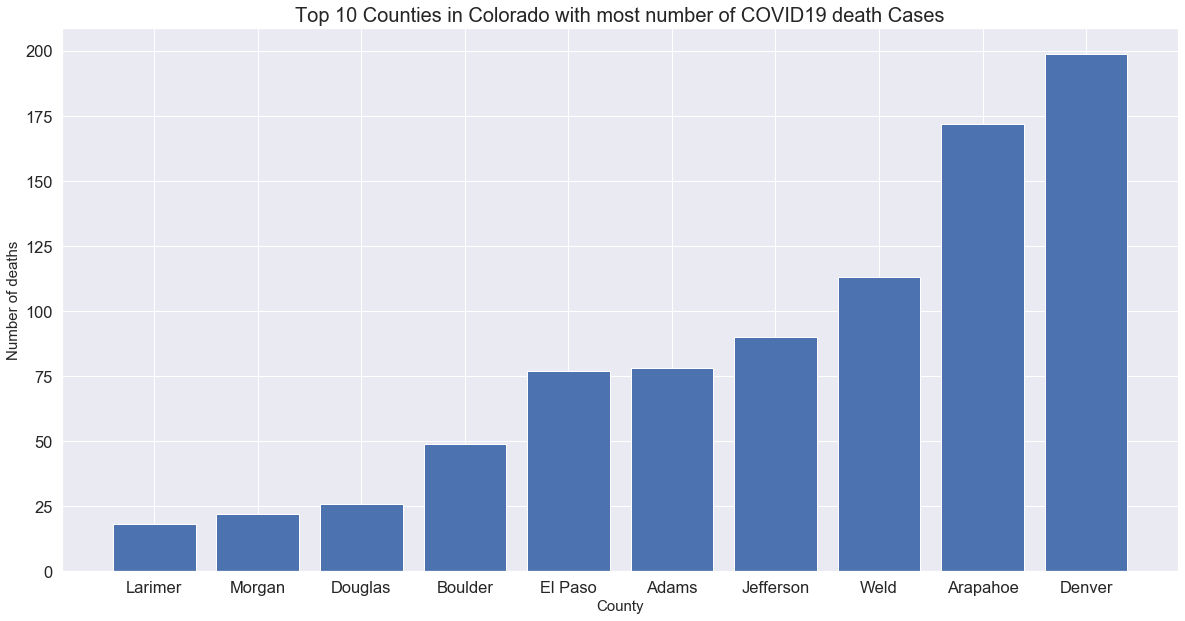

In [100]:
#Top 10 counties in colorado with most number of death cases in Colorado
#Denver tops the chart
fig = plt.figure(figsize=(20,10))
plt.bar(result2.sort_values('Deaths')["Deaths"].index[-10:],result2.sort_values('Deaths')["Deaths"].values[-10:],)
plt.xlabel("County",fontsize=15)
plt.ylabel("Number of deaths",fontsize=15)
plt.title("Top 10 Counties in Colorado with most number of COVID19 death Cases",fontsize=20)

In [101]:
#Cleaning the denver crime dataset by drooping the irrelevant columns
denver_crime=denver_crime.dropna(subset=['GEO_LAT','GEO_LON'])
denver_crime.isnull().sum()


INCIDENT_ID                    0
OFFENSE_ID                     0
OFFENSE_CODE                   0
OFFENSE_CODE_EXTENSION         0
OFFENSE_TYPE_ID                0
OFFENSE_CATEGORY_ID            0
FIRST_OCCURRENCE_DATE          0
LAST_OCCURRENCE_DATE      326315
REPORTED_DATE                  0
INCIDENT_ADDRESS           41065
GEO_X                          0
GEO_Y                          0
GEO_LON                        0
GEO_LAT                        0
DISTRICT_ID                    0
PRECINCT_ID                    0
NEIGHBORHOOD_ID                0
IS_CRIME                       0
IS_TRAFFIC                     0
dtype: int64

In [102]:
denver_crime

,INCIDENT_ID,OFFENSE_ID,OFFENSE_CODE,OFFENSE_CODE_EXTENSION,OFFENSE_TYPE_ID,OFFENSE_CATEGORY_ID,FIRST_OCCURRENCE_DATE,LAST_OCCURRENCE_DATE,REPORTED_DATE,INCIDENT_ADDRESS,GEO_X,GEO_Y,GEO_LON,GEO_LAT,DISTRICT_ID,PRECINCT_ID,NEIGHBORHOOD_ID,IS_CRIME,IS_TRAFFIC
0,2018869789,2018869789239900,2399,0,theft-other,larceny,12/27/2018 3:58:00 PM,NaN,12/27/2018 4:51:00 PM,2681 N HANOVER CT,3178210.0,1700715.0,-104.866156,39.755561,5,512,stapleton,1,0
1,2015664356,2015664356544100,5441,0,traffic-accident,traffic-accident,11/13/2015 7:45:00 AM,NaN,11/13/2015 8:38:00 AM,4100 BLOCK W COLFAX AVE,3129148.0,1694748.0,-105.040760,39.739991,1,122,west-colfax,0,1
2,20176005213,20176005213239901,2399,1,theft-bicycle,larceny,6/8/2017 1:15:00 PM,6/8/2017 5:15:00 PM,6/12/2017 8:44:00 AM,1705 17TH ST,3140790.0,1699792.0,-104.999264,39.753669,6,612,union-station,1,0
3,20196012240,20196012240230800,2308,0,theft-from-bldg,larceny,12/7/2019 1:07:00 PM,12/7/2019 6:30:00 PM,12/9/2019 1:35:00 PM,1350 N IRVING ST,3132400.0,1694088.0,-105.029208,39.738134,1,122,west-colfax,1,0
4,2018861883,2018861883501600,5016,0,violation-of-restraining-order,all-other-crimes,12/22/2018 8:15:00 PM,12/22/2018 8:31:00 PM,12/22/2018 10:00:00 PM,13625 E RANDOLPH PL,3188580.0,1716158.0,-104.828868,39.797750,5,521,montbello,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
480280,2020222218,2020222218250300,2503,0,forgery-counterfeit-of-obj,white-collar-crime,4/12/2020 6:52:00 PM,NaN,4/12/2020 10:45:00 PM,4900 S SYRACUSE ST,3168520.0,1653688.0,-104.901721,39.626643,3,324,hampden-south,1,0
480281,2020212778,2020212778240400,2404,0,theft-of-motor-vehicle,auto-theft,4/8/2020 7:00:00 AM,NaN,4/8/2020 12:15:00 PM,4400 BLK N GRANT ST,3145106.0,1708264.0,-104.983742,39.776860,1,112,globeville,1,0
480282,2020220528,2020220528230300,2303,0,theft-shoplift,larceny,4/11/2020 7:26:00 PM,NaN,4/11/2020 7:53:00 PM,4650 N PEORIA ST,3183651.0,1709929.0,-104.846569,39.780749,5,521,montbello,1,0
480283,2020220574,2020220574091200,912,0,homicide-other,murder,4/11/2020 7:58:00 PM,NaN,4/11/2020 9:22:00 PM,NaN,3128353.0,1675820.0,-105.043925,39.688041,4,421,mar-lee,1,0


In [103]:
#checking the different offense category types
denver_crime.OFFENSE_CATEGORY_ID.unique()

array(['larceny', 'traffic-accident', 'all-other-crimes',
       'public-disorder', 'theft-from-motor-vehicle', 'burglary',
       'other-crimes-against-persons', 'drug-alcohol',
       'white-collar-crime', 'auto-theft', 'robbery',
       'aggravated-assault', 'murder', 'arson'], dtype=object)

In [104]:
#Checking the number of occurences of each of the category
denver_crime['OFFENSE_CATEGORY_ID'].value_counts()

traffic-accident                124198
all-other-crimes                 85969
larceny                          48577
public-disorder                  48483
theft-from-motor-vehicle         38639
drug-alcohol                     30253
auto-theft                       27116
other-crimes-against-persons     23696
burglary                         23388
aggravated-assault               11916
white-collar-crime                6748
robbery                           6257
arson                              569
murder                             312
Name: OFFENSE_CATEGORY_ID, dtype: int64

In [105]:
#Cleaning the denver crime dataset by making the columns readable ,understandable and easier to work with
denver_crime.FIRST_OCCURRENCE_DATE = pd.to_datetime(denver_crime.FIRST_OCCURRENCE_DATE)
denver_crime["YEAR"] = denver_crime.FIRST_OCCURRENCE_DATE.dt.year
denver_crime["MONTH"] = denver_crime.FIRST_OCCURRENCE_DATE.dt.month
denver_crime


,INCIDENT_ID,OFFENSE_ID,OFFENSE_CODE,OFFENSE_CODE_EXTENSION,OFFENSE_TYPE_ID,OFFENSE_CATEGORY_ID,FIRST_OCCURRENCE_DATE,LAST_OCCURRENCE_DATE,REPORTED_DATE,INCIDENT_ADDRESS,...,GEO_Y,GEO_LON,GEO_LAT,DISTRICT_ID,PRECINCT_ID,NEIGHBORHOOD_ID,IS_CRIME,IS_TRAFFIC,YEAR,MONTH
0,2018869789,2018869789239900,2399,0,theft-other,larceny,2018-12-27 15:58:00,NaN,12/27/2018 4:51:00 PM,2681 N HANOVER CT,...,1700715.0,-104.866156,39.755561,5,512,stapleton,1,0,2018,12
1,2015664356,2015664356544100,5441,0,traffic-accident,traffic-accident,2015-11-13 07:45:00,NaN,11/13/2015 8:38:00 AM,4100 BLOCK W COLFAX AVE,...,1694748.0,-105.040760,39.739991,1,122,west-colfax,0,1,2015,11
2,20176005213,20176005213239901,2399,1,theft-bicycle,larceny,2017-06-08 13:15:00,6/8/2017 5:15:00 PM,6/12/2017 8:44:00 AM,1705 17TH ST,...,1699792.0,-104.999264,39.753669,6,612,union-station,1,0,2017,6
3,20196012240,20196012240230800,2308,0,theft-from-bldg,larceny,2019-12-07 13:07:00,12/7/2019 6:30:00 PM,12/9/2019 1:35:00 PM,1350 N IRVING ST,...,1694088.0,-105.029208,39.738134,1,122,west-colfax,1,0,2019,12
4,2018861883,2018861883501600,5016,0,violation-of-restraining-order,all-other-crimes,2018-12-22 20:15:00,12/22/2018 8:31:00 PM,12/22/2018 10:00:00 PM,13625 E RANDOLPH PL,...,1716158.0,-104.828868,39.797750,5,521,montbello,1,0,2018,12
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
480280,2020222218,2020222218250300,2503,0,forgery-counterfeit-of-obj,white-collar-crime,2020-04-12 18:52:00,NaN,4/12/2020 10:45:00 PM,4900 S SYRACUSE ST,...,1653688.0,-104.901721,39.626643,3,324,hampden-south,1,0,2020,4
480281,2020212778,2020212778240400,2404,0,theft-of-motor-vehicle,auto-theft,2020-04-08 07:00:00,NaN,4/8/2020 12:15:00 PM,4400 BLK N GRANT ST,...,1708264.0,-104.983742,39.776860,1,112,globeville,1,0,2020,4
480282,2020220528,2020220528230300,2303,0,theft-shoplift,larceny,2020-04-11 19:26:00,NaN,4/11/2020 7:53:00 PM,4650 N PEORIA ST,...,1709929.0,-104.846569,39.780749,5,521,montbello,1,0,2020,4
480283,2020220574,2020220574091200,912,0,homicide-other,murder,2020-04-11 19:58:00,NaN,4/11/2020 9:22:00 PM,NaN,...,1675820.0,-105.043925,39.688041,4,421,mar-lee,1,0,2020,4


In [106]:
#Drooping the crime occurances from the year 2015 to 2019.Retaining only the 2020 entries.
denver_crime = denver_crime[denver_crime.YEAR != 2018]
denver_crime = denver_crime[denver_crime.YEAR != 2017]
denver_crime = denver_crime[denver_crime.YEAR != 2016]
denver_crime = denver_crime[denver_crime.YEAR != 2015]
denver_crime = denver_crime[denver_crime.YEAR != 2019]
denver_crime



,INCIDENT_ID,OFFENSE_ID,OFFENSE_CODE,OFFENSE_CODE_EXTENSION,OFFENSE_TYPE_ID,OFFENSE_CATEGORY_ID,FIRST_OCCURRENCE_DATE,LAST_OCCURRENCE_DATE,REPORTED_DATE,INCIDENT_ADDRESS,...,GEO_Y,GEO_LON,GEO_LAT,DISTRICT_ID,PRECINCT_ID,NEIGHBORHOOD_ID,IS_CRIME,IS_TRAFFIC,YEAR,MONTH
20,2020131877,2020131877570700,5707,0,criminal-trespassing,all-other-crimes,2020-02-29 20:15:00,NaN,2/29/2020 9:16:00 PM,2222 LAWRENCE ST,...,1700184.0,-104.988366,39.754698,6,611,five-points,1,0,2020,2
71,2020121279,2020121279544100,5441,0,traffic-accident,traffic-accident,2020-02-25 11:00:00,NaN,2/25/2020 11:02:00 AM,E 9TH AVE / N OGDEN ST,...,1691372.0,-104.975266,39.730449,6,623,capitol-hill,0,1,2020,2
99,202029783,202029783230500,2305,0,theft-items-from-vehicle,theft-from-motor-vehicle,2020-01-13 23:00:00,1/14/2020 5:00:00 AM,1/14/2020 11:07:00 AM,1900 BLK W PACIFIC PL,...,1672896.0,-105.010399,39.679879,4,422,college-view-south-platte,1,0,2020,1
135,202043098,202043098521201,5212,1,weapon-by-prev-offender-powpo,all-other-crimes,2020-01-20 02:02:00,NaN,1/20/2020 3:36:00 AM,2100 BLOCK ARAPAHOE ST,...,1699548.0,-104.988962,39.752955,6,611,five-points,1,0,2020,1
156,202046559,202046559230300,2303,0,theft-shoplift,larceny,2020-01-21 15:43:00,NaN,1/21/2020 5:13:00 PM,8298 E NORTHFIELD BLVD,...,1711073.0,-104.891880,39.784132,5,511,stapleton,1,0,2020,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
480280,2020222218,2020222218250300,2503,0,forgery-counterfeit-of-obj,white-collar-crime,2020-04-12 18:52:00,NaN,4/12/2020 10:45:00 PM,4900 S SYRACUSE ST,...,1653688.0,-104.901721,39.626643,3,324,hampden-south,1,0,2020,4
480281,2020212778,2020212778240400,2404,0,theft-of-motor-vehicle,auto-theft,2020-04-08 07:00:00,NaN,4/8/2020 12:15:00 PM,4400 BLK N GRANT ST,...,1708264.0,-104.983742,39.776860,1,112,globeville,1,0,2020,4
480282,2020220528,2020220528230300,2303,0,theft-shoplift,larceny,2020-04-11 19:26:00,NaN,4/11/2020 7:53:00 PM,4650 N PEORIA ST,...,1709929.0,-104.846569,39.780749,5,521,montbello,1,0,2020,4
480283,2020220574,2020220574091200,912,0,homicide-other,murder,2020-04-11 19:58:00,NaN,4/11/2020 9:22:00 PM,NaN,...,1675820.0,-105.043925,39.688041,4,421,mar-lee,1,0,2020,4


In [107]:
#Creating another table just for April crime entries when the covid19 cases were in its peak in US
data_after_april = denver_crime.copy()
data_after_april = data_after_april[data_after_april.MONTH != 1]
data_after_april = data_after_april[data_after_april.MONTH != 2]
data_after_april = data_after_april[data_after_april.MONTH != 3]

data_after_april



,INCIDENT_ID,OFFENSE_ID,OFFENSE_CODE,OFFENSE_CODE_EXTENSION,OFFENSE_TYPE_ID,OFFENSE_CATEGORY_ID,FIRST_OCCURRENCE_DATE,LAST_OCCURRENCE_DATE,REPORTED_DATE,INCIDENT_ADDRESS,...,GEO_Y,GEO_LON,GEO_LAT,DISTRICT_ID,PRECINCT_ID,NEIGHBORHOOD_ID,IS_CRIME,IS_TRAFFIC,YEAR,MONTH
455524,2020209855,2020209855230500,2305,0,theft-items-from-vehicle,theft-from-motor-vehicle,2020-04-06 18:00:00,4/7/2020 3:30:00 AM,4/7/2020 4:06:00 AM,5100 BLK W ALASKA PL,...,1683399.0,-105.052611,39.708881,4,412,westwood,1,0,2020,4
455623,2020203412,2020203412570700,5707,0,criminal-trespassing,all-other-crimes,2020-04-04 02:01:00,NaN,4/4/2020 5:09:00 AM,150 W 9TH AVE,...,1690969.0,-104.989805,39.729407,6,611,civic-center,1,0,2020,4
456227,2020208240,2020208240120500,1205,0,robbery-street,robbery,2020-04-06 11:30:00,NaN,4/6/2020 11:35:00 AM,3390 W ALAMEDA AVE,...,1684184.0,-105.031111,39.710952,4,412,westwood,1,0,2020,4
457484,2020215694,2020215694544100,5441,0,traffic-accident,traffic-accident,2020-04-09 16:29:00,NaN,4/9/2020 5:42:00 PM,300 BLOCK S KALAMATH ST,...,1683921.0,-104.997438,39.710091,3,312,baker,0,1,2020,4
458807,2020207478,2020207478239900,2399,0,theft-other,larceny,2020-04-06 00:42:00,NaN,4/6/2020 1:31:00 AM,1690 N PEARL ST,...,1695943.0,-104.979603,39.743017,6,621,north-capitol-hill,1,0,2020,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
480280,2020222218,2020222218250300,2503,0,forgery-counterfeit-of-obj,white-collar-crime,2020-04-12 18:52:00,NaN,4/12/2020 10:45:00 PM,4900 S SYRACUSE ST,...,1653688.0,-104.901721,39.626643,3,324,hampden-south,1,0,2020,4
480281,2020212778,2020212778240400,2404,0,theft-of-motor-vehicle,auto-theft,2020-04-08 07:00:00,NaN,4/8/2020 12:15:00 PM,4400 BLK N GRANT ST,...,1708264.0,-104.983742,39.776860,1,112,globeville,1,0,2020,4
480282,2020220528,2020220528230300,2303,0,theft-shoplift,larceny,2020-04-11 19:26:00,NaN,4/11/2020 7:53:00 PM,4650 N PEORIA ST,...,1709929.0,-104.846569,39.780749,5,521,montbello,1,0,2020,4
480283,2020220574,2020220574091200,912,0,homicide-other,murder,2020-04-11 19:58:00,NaN,4/11/2020 9:22:00 PM,NaN,...,1675820.0,-105.043925,39.688041,4,421,mar-lee,1,0,2020,4


In [108]:
#Addition test
data_after_april_test = denver_crime.copy()
data_after_april_test = data_after_april_test[data_after_april_test.MONTH != 1]
data_after_april_test = data_after_april_test[data_after_april_test.MONTH != 2]


data_after_april_test

,INCIDENT_ID,OFFENSE_ID,OFFENSE_CODE,OFFENSE_CODE_EXTENSION,OFFENSE_TYPE_ID,OFFENSE_CATEGORY_ID,FIRST_OCCURRENCE_DATE,LAST_OCCURRENCE_DATE,REPORTED_DATE,INCIDENT_ADDRESS,...,GEO_Y,GEO_LON,GEO_LAT,DISTRICT_ID,PRECINCT_ID,NEIGHBORHOOD_ID,IS_CRIME,IS_TRAFFIC,YEAR,MONTH
1149,2020137723,2020137723544100,5441,0,traffic-accident,traffic-accident,2020-03-03 13:50:00,NaN,3/3/2020 3:31:00 PM,W ALAMEDA AVE / S CLAY ST,...,1684278.0,-105.020336,39.711167,4,412,athmar-park,0,1,2020,3
2790,2020132689,2020132689260401,2604,1,fraud-criminal-impersonation,white-collar-crime,2020-03-01 03:20:00,NaN,3/1/2020 4:50:00 AM,1600 BLK N BROADWAY ST,...,1695752.0,-104.987860,39.742529,6,611,cbd,1,0,2020,3
2984,2020137637,2020137637357200,3572,0,drug-methampetamine-possess,drug-alcohol,2020-03-03 13:48:00,NaN,3/3/2020 2:23:00 PM,17TH ST / CHESTNUT PL,...,1700178.0,-105.002407,39.754742,6,612,union-station,1,0,2020,3
5207,2020135919,2020135919230300,2303,0,theft-shoplift,larceny,2020-03-02 17:27:00,NaN,3/2/2020 5:56:00 PM,2950 W EVANS AVE,...,1672276.0,-105.023673,39.678231,4,422,college-view-south-platte,1,0,2020,3
5281,2020138616,2020138616570700,5707,0,criminal-trespassing,all-other-crimes,2020-03-03 21:22:00,NaN,3/3/2020 11:08:00 PM,1576 N SHERMAN ST,...,1695365.0,-104.984490,39.741452,6,621,north-capitol-hill,1,0,2020,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
480280,2020222218,2020222218250300,2503,0,forgery-counterfeit-of-obj,white-collar-crime,2020-04-12 18:52:00,NaN,4/12/2020 10:45:00 PM,4900 S SYRACUSE ST,...,1653688.0,-104.901721,39.626643,3,324,hampden-south,1,0,2020,4
480281,2020212778,2020212778240400,2404,0,theft-of-motor-vehicle,auto-theft,2020-04-08 07:00:00,NaN,4/8/2020 12:15:00 PM,4400 BLK N GRANT ST,...,1708264.0,-104.983742,39.776860,1,112,globeville,1,0,2020,4
480282,2020220528,2020220528230300,2303,0,theft-shoplift,larceny,2020-04-11 19:26:00,NaN,4/11/2020 7:53:00 PM,4650 N PEORIA ST,...,1709929.0,-104.846569,39.780749,5,521,montbello,1,0,2020,4
480283,2020220574,2020220574091200,912,0,homicide-other,murder,2020-04-11 19:58:00,NaN,4/11/2020 9:22:00 PM,NaN,...,1675820.0,-105.043925,39.688041,4,421,mar-lee,1,0,2020,4


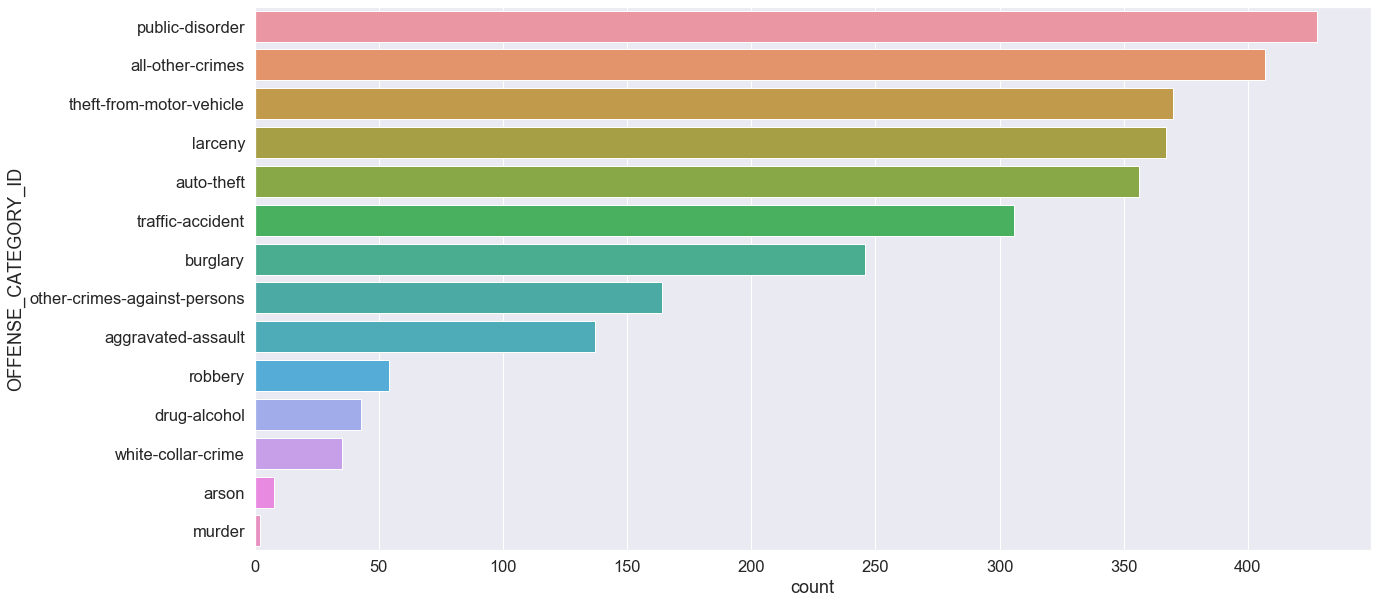

In [109]:
#Visualization to know which of the crime was reported the most in April when covid19 cases was in its peak
#We can see Public disorder tops the chart.This can occur if the people not maintaining social distancing or for some other reasons
plt.figure(figsize=(20,10))
category_frequency1 = data_after_april.OFFENSE_CATEGORY_ID.value_counts()
sns.countplot(y="OFFENSE_CATEGORY_ID", data=data_after_april, order=category_frequency1.index)

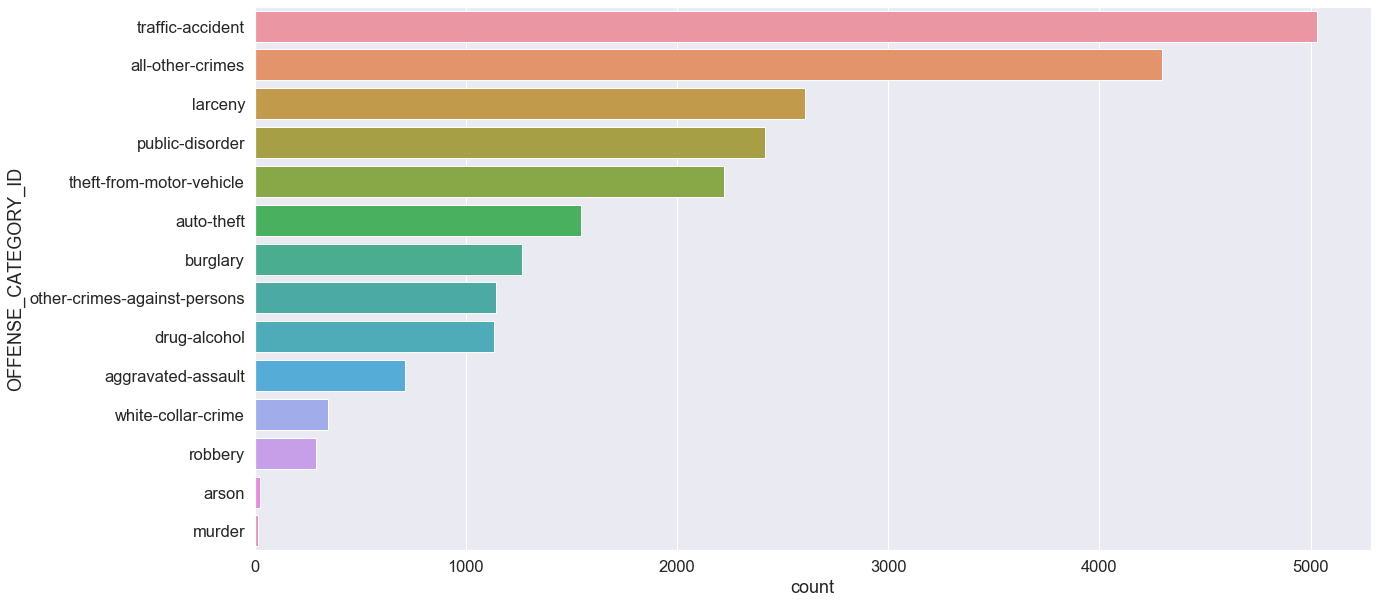

In [110]:
#This is a visualisation which shows the offense category which was the highest before covid19 hit US
#We can see traffic accidents were highest in occurence
plt.figure(figsize=(20,10))
category_frequency = denver_crime.OFFENSE_CATEGORY_ID.value_counts()
sns.countplot(y="OFFENSE_CATEGORY_ID", data=denver_crime, order=category_frequency.index)

In [111]:

is_crime = denver_crime[denver_crime.IS_CRIME==1]
is_traffic = denver_crime[denver_crime.IS_TRAFFIC==1]


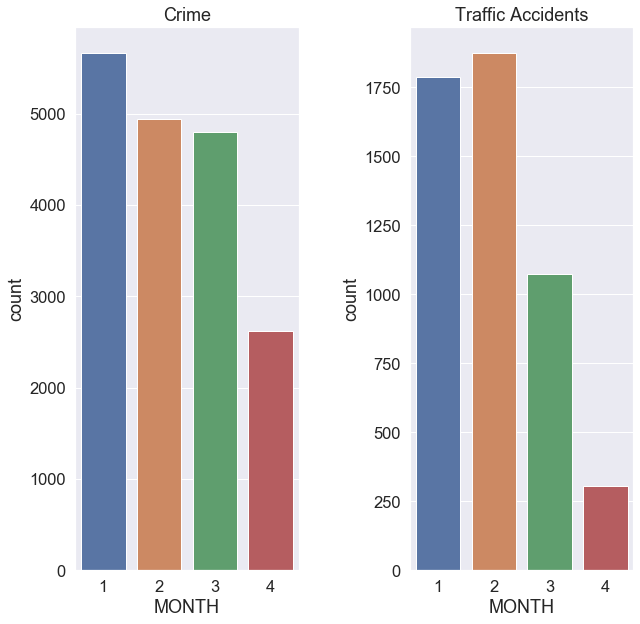

In [112]:
#Total number of crime and traffic accidents per month in 2020
#We can see traffic accidents have decreased drastically over time due to the lockdown and stay at home order imposed.
x, axes = plt.subplots(1,2)
x.set_figheight(10)
x.set_figwidth(10)
plt.subplots_adjust(wspace=.5)
axes[0].set_title("Crime")
sns.countplot(x="MONTH", data=is_crime,ax=axes[0])
axes[1].set_title("Traffic Accidents")
sns.countplot(x="MONTH", data=is_traffic,ax=axes[1])

In [113]:
pearsoncorr = denver_crime.corr(method='pearson')

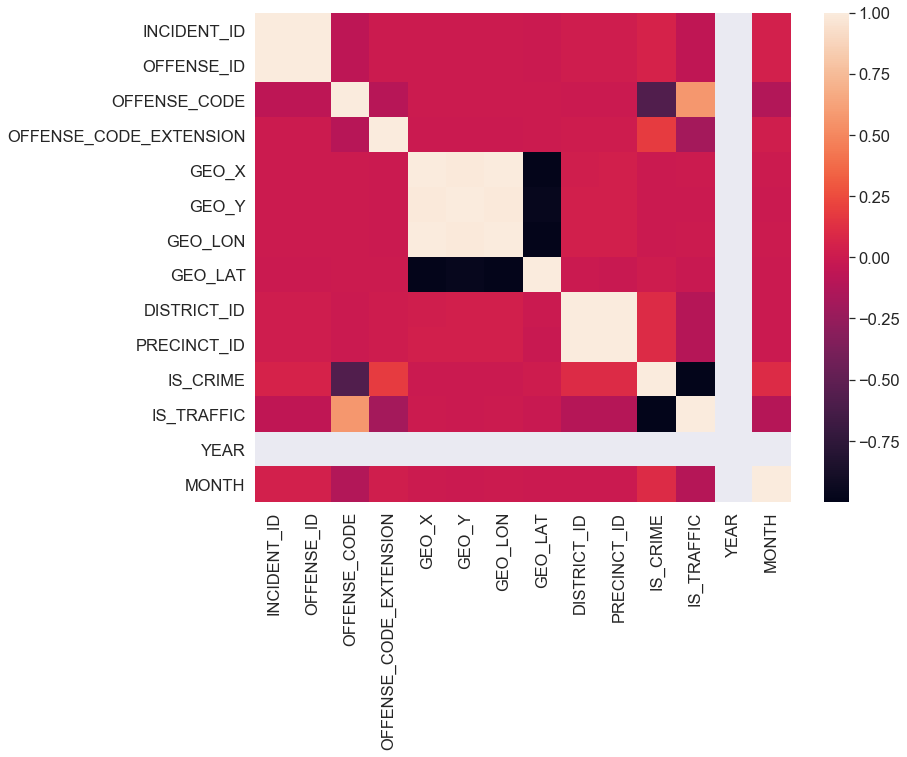

In [114]:
plt.figure(figsize=(12, 9))
sns.heatmap(pearsoncorr)

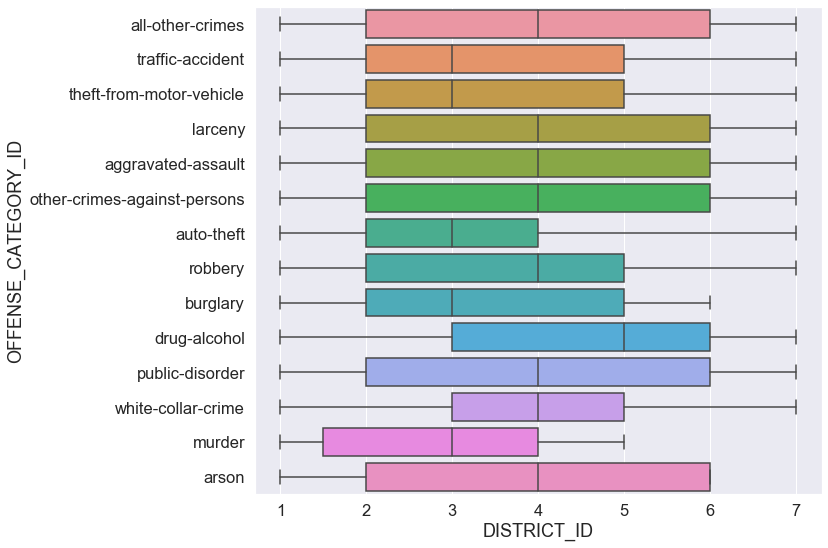

In [115]:
fig = plt.figure(figsize=(20, 15))
sns.set(font_scale=1.5)
fig1 = fig.add_subplot(221); sns.boxplot(x='DISTRICT_ID', y='OFFENSE_CATEGORY_ID', data=denver_crime[['DISTRICT_ID', 'OFFENSE_CATEGORY_ID']])
plt.tight_layout()
plt.show()

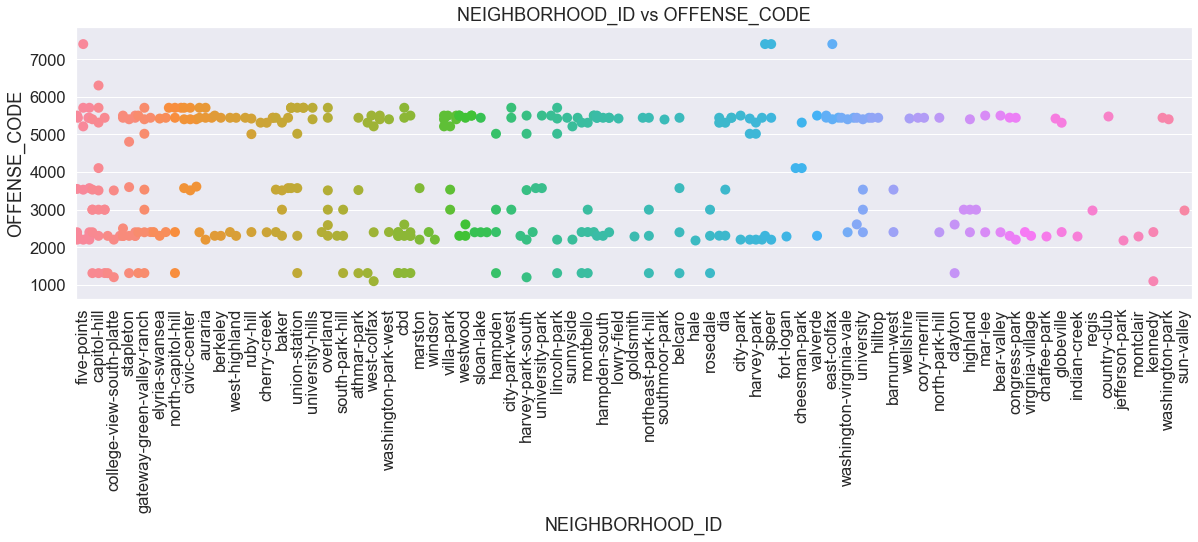

In [116]:
plt.figure(figsize=(20, 5))
sns.swarmplot(x='NEIGHBORHOOD_ID', y='OFFENSE_CODE', data=denver_crime.head(350), size =10)
plt.xticks(rotation=90)
plt.title('NEIGHBORHOOD_ID vs OFFENSE_CODE')
plt.show()

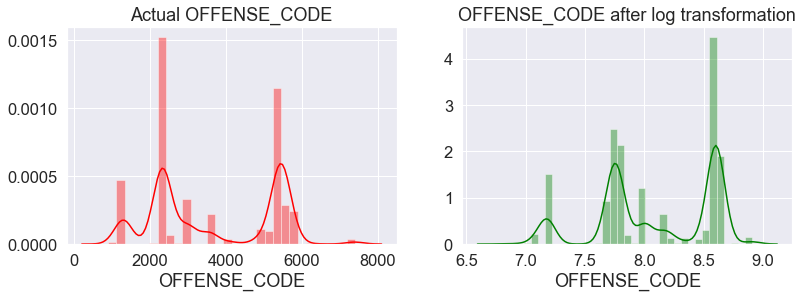

In [117]:
figure = plt.figure(figsize = (13,4))
plt.subplot(1,2,1)
sns.distplot(denver_crime.OFFENSE_CODE, color = 'red')
plt.title('Actual OFFENSE_CODE')
plt.subplot(1,2,2)
sns.distplot(np.log(denver_crime.OFFENSE_CODE), color = 'green')
plt.title('OFFENSE_CODE after log transformation')
plt.show()

In [118]:
########################################################################
############################inference1##################################
#Addition test
colorado_data.drop('Province_State',axis=1,inplace= True)
colorado_data.drop('Country_Region',axis=1,inplace=True)
colorado_data1.drop('Province_State',axis=1,inplace= True)
colorado_data1.drop('Country_Region',axis=1,inplace=True)

C:\Users\shravya\anaconda3\lib\site-packages\pandas\core\frame.py:3997: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


,Date,Confirmed Cases
0,NaN,0
1,1/22/20,0
2,1/23/20,0
3,1/24/20,0
4,1/25/20,0
...,...,...
107,5/7/20,18370
108,5/8/20,18827
109,5/9/20,19375
110,5/10/20,19703


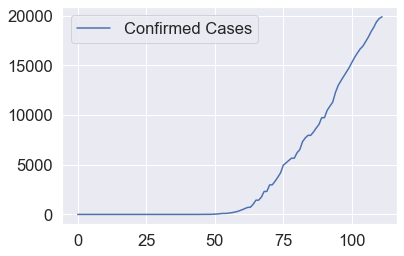

In [119]:
#Total number of cases per day in Colorado(Includes all counties)
df1=colorado_data.sum()
df= df1.T
df=df[1:]
df.to_csv("date_confirmed.csv")
total_df= pd.read_csv("date_confirmed.csv",sep=",",names=['Date','Confirmed Cases'])
total_df.plot()
date_confirmed= total_df
date_confirmed
#change date format




In [120]:
#Total number of death cases per day in Colorado(Includes all counties)
df_2=colorado_data1.sum()
df_3= df_2.T
df_3=df_3[1:]
df_3.to_csv("date_deaths.csv")
total_df_2= pd.read_csv("date_deaths.csv",sep=",",names=['Date','Deaths'])
date_deaths= total_df_2
date_deaths

#change date format





,Date,Deaths
0,NaN,0
1,1/22/20,0
2,1/23/20,0
3,1/24/20,0
4,1/25/20,0
...,...,...
107,5/7/20,944
108,5/8/20,960
109,5/9/20,967
110,5/10/20,971


In [121]:
from statsmodels.tsa.seasonal import seasonal_decompose
total_df['Date']=pd.to_datetime(total_df['Date'])
total_df.set_index('Date', inplace=True)


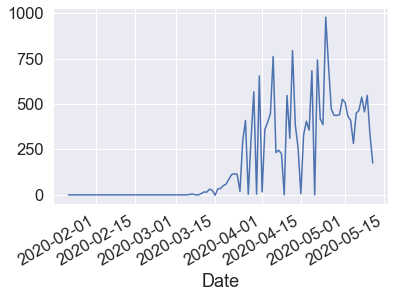

In [123]:
total_df['stationary']=total_df['Confirmed Cases'].diff()
total_df['stationary'].plot()

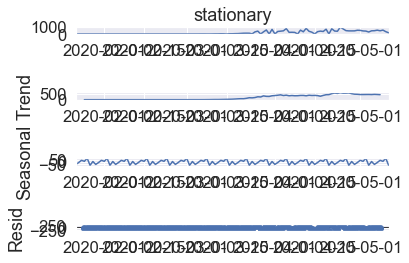

In [124]:
decomposed = seasonal_decompose(total_df['stationary'].dropna(), model='additive')
x =decomposed.plot()

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


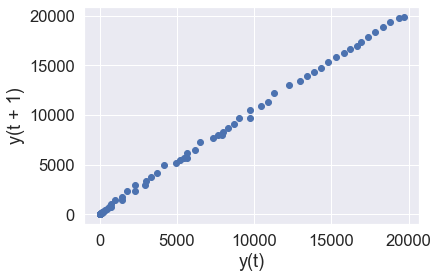

In [125]:
pd.plotting.lag_plot(total_df['Confirmed Cases'])

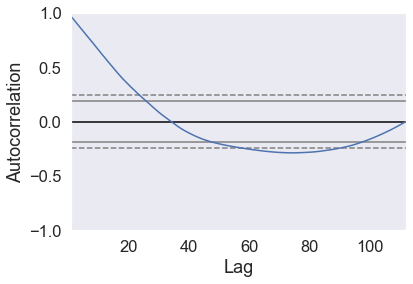

In [126]:
pd.plotting.autocorrelation_plot(total_df['Confirmed Cases'])

In [127]:
tdf=total_df.tail(29)

from statsmodels.tsa.ar_model import AR
from sklearn.metrics import r2_score
X = tdf['stationary'].dropna()

train_data = X[:22]
test_data = X[X[22:]]

len(test_data)

7

In [128]:
#need to calculate MAPE
#MSE
#EWMA CALCULATION
#CHECK HOW TO SET P VALUE FOR AR
#DO AR
#WHAT IS EWMA?

In [129]:
#inference 2
import numpy as np
import math
last2weeks=date_confirmed.tail(14)
seclast_week =last2weeks.head(7)
last_week= last2weeks.tail(7)
X_mean = last_week["Confirmed Cases"].mean(axis=0)
mean_o = seclast_week['Confirmed Cases'].mean(axis=0)
std_dev= date_confirmed["Confirmed Cases"].std(axis=0)
nroot =math.sqrt(len(date_confirmed))
Z= (X_mean - mean_o)/ (std_dev/nroot)
threshold= 1.96

#ONE SAMPLE Z TEST
if(abs(Z)> threshold):
    print("Ho is rejected with absolute value of T  as",abs(Z))
else:
    print("Ho is rejected with absolute value of T  as",abs(Z))

    


Ho is rejected with absolute value of T  as 5.262412465296163


In [130]:
#TWO SAMPLED T TEST

#paired
D=[]
weekSL= seclast_week['Confirmed Cases']. values. tolist()
weekL= last_week['Confirmed Cases']. values. tolist()
for i in range(len(weekSL)):
    D.append(weekL[i]-weekSL[i])
Dmean= (sum(D)/len(D))
T= Dmean/(std_dev/math.sqrt(len(D)))

if(abs(T)> threshold):
    print("Ho is rejected with absolute value of T  as",abs(T))
else:
    print("Ho is rejected with absolute value of T  as",abs(T))


Ho is rejected with absolute value of T  as 1.3156031163240403


In [131]:
# ONE SAMPLE WALD'S TEST
from scipy import stats
theta0 = mean_o
theta_hat = X_mean #Poisson MLE is sample mean
W = (theta_hat-theta0)/np.sqrt(theta_hat/len(last_week))
c = stats.norm().isf(0.05/2)
if(abs(W)> c):
    print("Ho is rejected with absolute value of W as",abs(W))
else:
    print("Ho is accepted with absolute value of W as",abs(W))

Ho is rejected with absolute value of W as 59.11266803721179


In [132]:
# TWO SAMPLED WALD'S TEST

weekSL= seclast_week['Confirmed Cases']. values. tolist()
weekL= last_week['Confirmed Cases']. values. tolist()
# Poisson distribution - MLE is sample mean
X_mean = last_week["Confirmed Cases"].mean(axis=0)
Y_mean = seclast_week['Confirmed Cases'].mean(axis=0)
sX=0
sY=0
for i in range(len(weekSL)):
    sX+= (i-X_mean)**2
    sY+= (i-Y_mean)**2
sX= sX/len(weekL)
sY= sY/len(weekSL)
denom= math.sqrt((sX/len(weekL))+(sY/len(weekSL)))
W = ((X_mean-Y_mean)/(denom))
if(abs(W)> c):
    print("Ho is rejected with absolute value of W as",abs(W))
else:
    print("Ho is accepted with absolute value of W as",abs(W))

Ho is accepted with absolute value of W as 0.33098580581133785


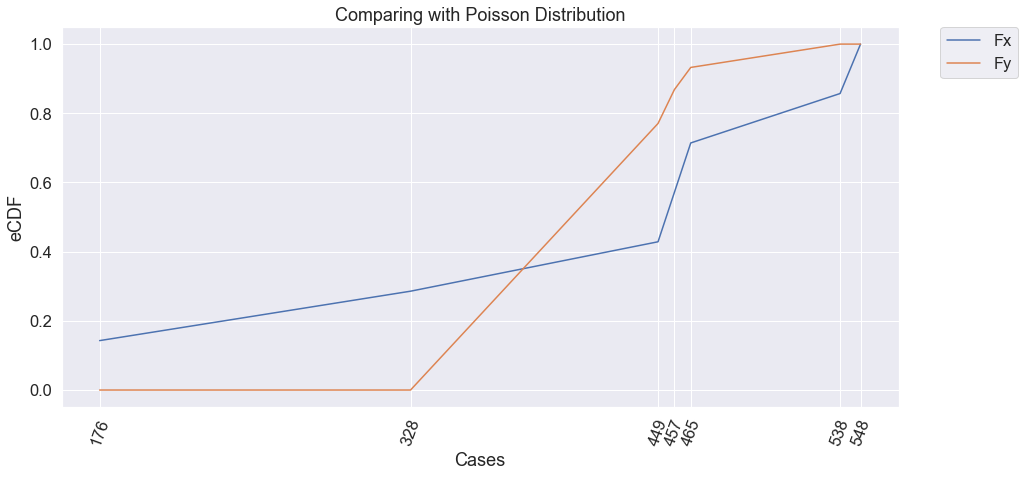

       x            Fy       Fx-       Fx+        Fy-Fx-        Fy-Fx+
0  176.0  4.033573e-45  0.000000  0.142857  4.033573e-45  1.428571e-01
1  328.0  6.061657e-08  0.142857  0.285714  1.428571e-01  2.857142e-01
2  449.0  7.705676e-01  0.285714  0.428571  4.848533e-01  3.419961e-01
3  457.0  8.684496e-01  0.428571  0.571429  4.398782e-01  2.970210e-01
4  465.0  9.325766e-01  0.571429  0.714286  3.611480e-01  2.182908e-01
5  538.0  9.999993e-01  0.714286  0.857143  2.857136e-01  1.428565e-01
6  548.0  9.999999e-01  0.857143  1.000000  1.428571e-01  6.519774e-08
Ho is rejected as D is  0.48485326582973787  (given C = 0.05)


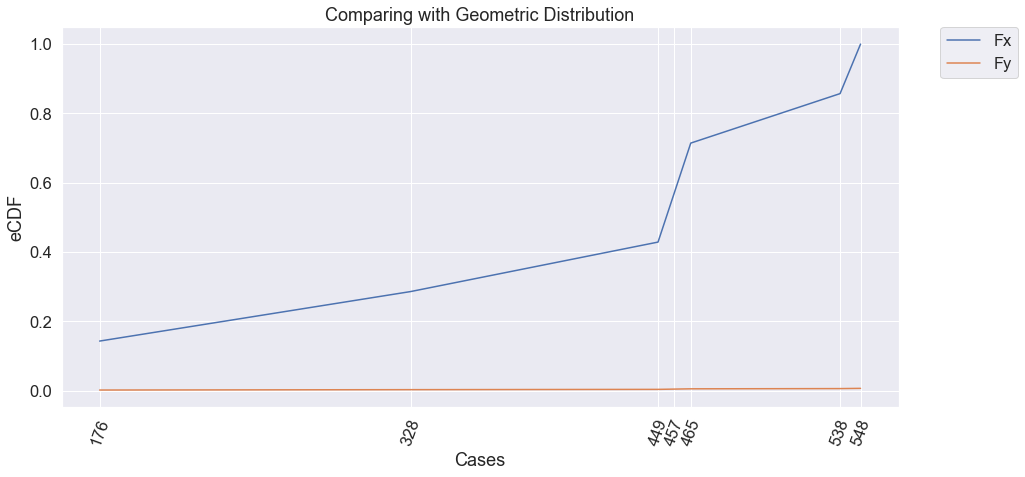

       x        Fy       Fx-       Fx+    Fy-Fx-    Fy-Fx+
0  176.0  0.001539  0.000000  0.142857  0.001539  0.141319
1  328.0  0.002622  0.142857  0.285714  0.140235  0.283092
2  449.0  0.003442  0.285714  0.428571  0.282272  0.425130
3  457.0  0.004247  0.428571  0.571429  0.424325  0.567182
4  465.0  0.005037  0.571429  0.714286  0.566392  0.709249
5  538.0  0.005704  0.714286  0.857143  0.708581  0.851438
6  548.0  0.006357  0.857143  1.000000  0.850786  0.993643
Ho is rejected as D is  0.9936431044031026  (given C = 0.05)
434.14285714285717 5363.265306122449
n=  -38.238047920108315 p=  -11.353687773233675
looking at estomated n and p values we can clearly see that this data would not be a good fit for binomial


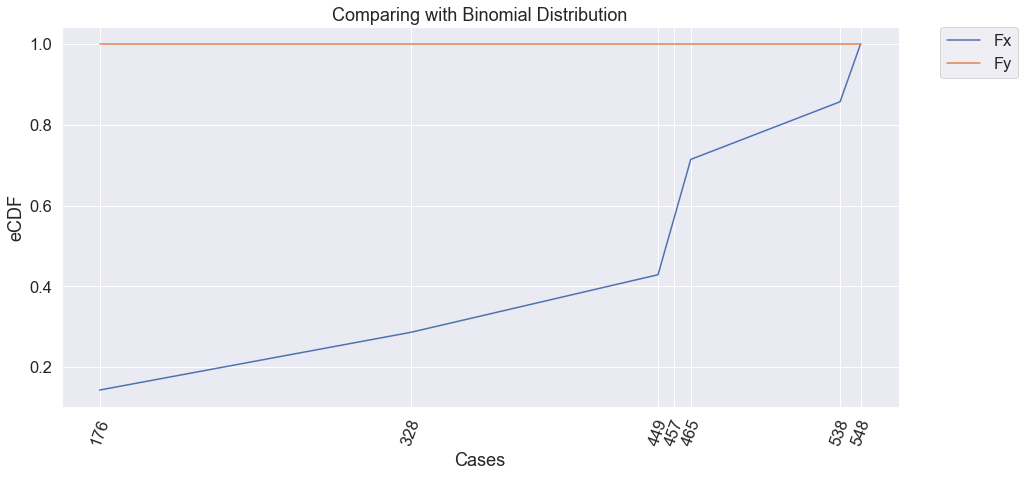

       x   Fy       Fx-       Fx+    Fy-Fx-    Fy-Fx+
0  176.0  1.0  0.000000  0.142857  1.000000  0.857143
1  328.0  1.0  0.142857  0.285714  0.857143  0.714286
2  449.0  1.0  0.285714  0.428571  0.714286  0.571429
3  457.0  1.0  0.428571  0.571429  0.571429  0.428571
4  465.0  1.0  0.571429  0.714286  0.428571  0.285714
5  538.0  1.0  0.714286  0.857143  0.285714  0.142857
6  548.0  1.0  0.857143  1.000000  0.142857  0.000000
Ho is rejected as D is  1.0  (given C = 0.05)


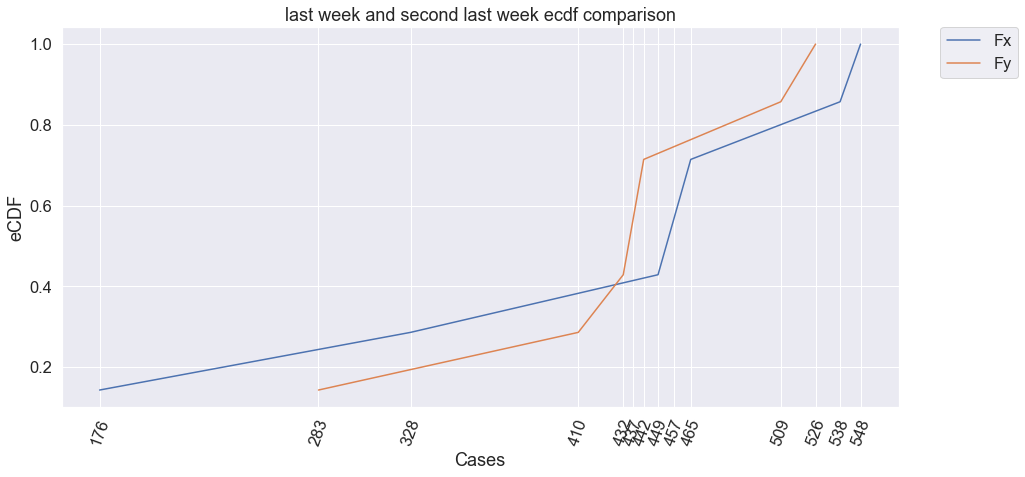

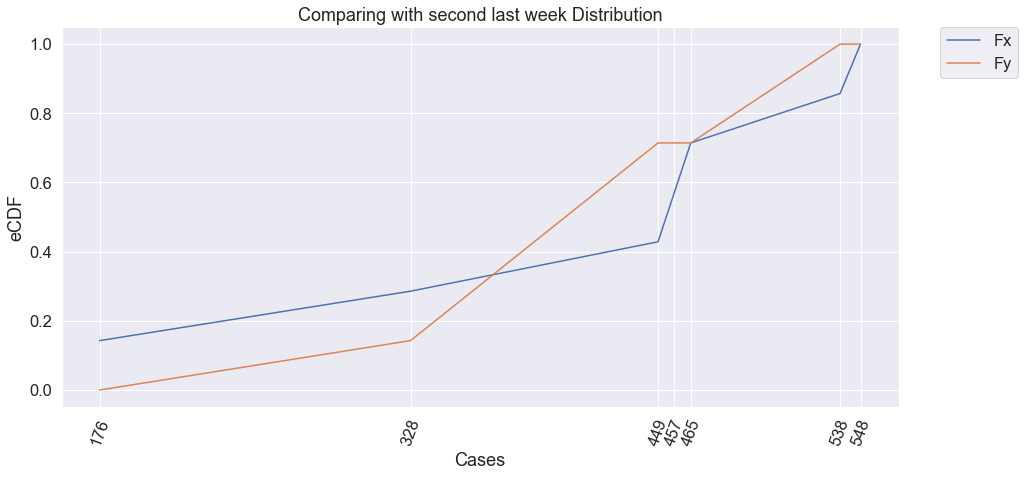

       x        Fy       Fx-       Fx+    Fy-Fx-    Fy-Fx+
0  176.0  0.000000  0.000000  0.142857  0.000000  0.142857
1  328.0  0.142857  0.142857  0.285714  0.000000  0.142857
2  449.0  0.714286  0.285714  0.428571  0.428571  0.285714
3  457.0  0.714286  0.428571  0.571429  0.285714  0.142857
4  465.0  0.714286  0.571429  0.714286  0.142857  0.000000
5  538.0  1.000000  0.714286  0.857143  0.285714  0.142857
6  548.0  1.000000  0.857143  1.000000  0.142857  0.000000
Ho is rejected as D is  0.4285714285714286  (given C = 0.05)
****** Please scroll up to see all graphs and analysis of KS test ******


In [133]:
##############################################INFERENCE3(KS TEST and PERMUTATION TEST)########################
#K-S test 
import numpy as np
import math
from scipy.stats import poisson
from scipy.stats import geom
from scipy.stats import binom

def plotvalues(Fy, y, Fx, x, title, xvals):
  plt.figure(figsize=(15,7))
  sns.set(font_scale=1.5)
  plt.tight_layout()
  plt.plot(x, Fx, label="Fx")
  plt.plot(y, Fy, label="Fy")
  plt.xlabel('Cases')
  plt.ylabel('eCDF')
  plt.xticks(xvals, rotation="70")
  plt.title(title)
  plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)
  plt.show()
  

def kstest(Fy, last_week_confirmed, C, title):

  Fx = [0]

  for i in last_week_confirmed:
    cdf = len([k for k in last_week_confirmed if k <= i]) / len(last_week_confirmed)
    Fx.append(cdf)

  plotvalues(Fy, last_week_confirmed,  Fx[1:], last_week_confirmed, title, last_week_confirmed)

  ks_df = pd.DataFrame()
  ks_df["x"] = last_week_confirmed
  ks_df["Fy"] = Fy
  ks_df["Fx-"] = Fx[:-1]
  ks_df["Fx+"] = Fx[1:]
  ks_df["Fy-Fx-"] = abs(ks_df["Fy"] - ks_df["Fx-"])
  ks_df["Fy-Fx+"] = abs(ks_df["Fy"] - ks_df["Fx+"])
  print(ks_df)

  D = max(ks_df["Fy-Fx-"].max(),ks_df["Fy-Fx+"].max())

  if D > C:
    print("Ho is rejected as D is ", D, " (given C = 0.05)")
  else:
    print("Ho is accepted as D is ", D, " (given C = 0.05)")

def cdf_calc(fx):
  Fx = [fx[0]]
  for i in range(1, len(fx)):
    Fx.append(fx[i]+Fx[i-1])
  return Fx

#Poisson 

def poisson_cdf(last_week_confirmed, pois_lambda):
  # fx = []
  # for i in last_week_confirmed:
  #   num1 = math.pow(pois_lambda,x)
  #   num2 = (math.exp(-pois_lambda))
  #   num = num1 * num2
  #   denom = math.factorial(x)
  #   fx.append(num/denom)

  # cdf = cdf_calc(fx)
  # return cdf
  Fx = []

  for i in last_week_confirmed:
    Fx.append(poisson.cdf(i, pois_lambda))
  return Fx

def geom_cdf(last_week_confirmed, p):
  fx = []
  for i in last_week_confirmed:
    val = ((1-p)**(i-1)) * p
    fx.append(val)
  Fx = cdf_calc(fx)
  return Fx


def binom_cdf(last_week_confirmed, n, p):
  Fx = []

  for i in last_week_confirmed:
    Fx.append(binom.cdf(i, n, p))
  return Fx

last2weeks=date_confirmed.tail(14)
seclast_week =last2weeks.head(7)
last_week= last2weeks.tail(7)

seclast_week_confirmed = sorted(seclast_week['stationary'])
last_week_confirmed = sorted(last_week['stationary'])
C = 0.05

# 1-sample

# calculating MME of second last week and calculating cdfs 

sample_mean = np.mean(np.array(seclast_week['stationary']))

# poisson
pois_lambda = sample_mean
Fx_poisson = poisson_cdf(last_week_confirmed, pois_lambda)
kstest(Fx_poisson, last_week_confirmed, C, 'Comparing with Poisson Distribution')

# Geometric 
p = 1/sample_mean
Fx_geometric = geom_cdf(last_week_confirmed, p)
kstest(Fx_geometric, last_week_confirmed, C, 'Comparing with Geometric Distribution')

# Binomial
sample_variance = np.var(np.array(seclast_week['stationary']))
print(sample_mean, sample_variance)
n = sample_mean**2 / (sample_mean-sample_variance)
p = sample_mean / n
print("n= ", n, "p= ", p)

print("looking at estomated n and p values we can clearly see that this data would not be a good fit for binomial")

Fx_binomial = binom_cdf(last_week_confirmed, n, p)
kstest(Fx_binomial, last_week_confirmed, C, 'Comparing with Binomial Distribution')

# 2-samples 

Fx_seclast_week = []
for i in seclast_week_confirmed:
  cdf = len([k for k in seclast_week_confirmed if k <= i]) / len(seclast_week_confirmed)
  Fx_seclast_week.append(cdf)

Fx_last_week = []
for i in last_week_confirmed:
  cdf = len([k for k in last_week_confirmed if k <= i]) / len(last_week_confirmed)
  Fx_last_week.append(cdf)

xvalues = []
xvalues.extend(last_week_confirmed)
xvalues.extend(seclast_week_confirmed)
xvalues.sort()
plotvalues(Fx_seclast_week, seclast_week_confirmed,  Fx_last_week, last_week_confirmed, "last week and second last week ecdf comparison", xvalues)

Fy_two_sample = []
for i in last_week_confirmed:
  cdf = len([k for k in seclast_week_confirmed if k <= i]) / len(seclast_week_confirmed)
  Fy_two_sample.append(cdf)
kstest(Fy_two_sample, last_week_confirmed, C, 'Comparing with second last week Distribution')


print("****** Please scroll up to see all graphs and analysis of KS test ******")

In [134]:
# Permutation test 

import random

def mean(x):
  return sum(x)/len(x)

def perm_test(n, list1, list2, alpha):
  Tobs = abs(list1.mean() - list2.mean())

  all_data = []
  all_data.extend(list1)
  all_data.extend(list2)

  result = []

  for i in range(n):
    permute = random.shuffle(all_data)
    temp_list1 = all_data[:len(list1)]
    temp_list2 = all_data[-len(list1):]
    Ti = abs(mean(temp_list1) - mean(temp_list2))
    if Ti > Tobs:
      result.append(1)
    else:
      result.append(0)

  p_value = sum(result) / n

  if p_value <= alpha: 
    print("Ho is accepted as p-value is ", p_value, " (given alpha = 0.05)")
  else:
    print("Ho is rejected as p-value is ", p_value, " (given alpha = 0.05)")

seclast_week_data = seclast_week['stationary']
last_week_data = last_week['stationary']
alpha = 0.05 

perm_test(100000, seclast_week_data, last_week_data, alpha)

Ho is rejected as p-value is  0.84912  (given alpha = 0.05)


## 

In [135]:
#########################################INFERRENCE4(CONFIRMED CASES)##################################################
#####################################################################################################
#Month under consideration for calculating pearson's correlation
#Obtaining the month's data from COVID dataset - 5th March to 5th April
month_under_consideration_test=date_confirmed.tail(66)
month_test=month_under_consideration_test.head(32)


In [136]:
#Obtaining month's data from denver crime dataset

data_after_april_test['Date'] = data_after_april_test['FIRST_OCCURRENCE_DATE'].dt.date

data_after_april_test = data_after_april_test.sort_values(by="Date")




In [137]:
final_inference_data_test = data_after_april_test[['OFFENSE_CATEGORY_ID','Date','IS_CRIME','IS_TRAFFIC']]


In [138]:
final_inference_data1_test = final_inference_data_test.loc[final_inference_data_test['OFFENSE_CATEGORY_ID'] == 'traffic-accident']


In [139]:
group_test1 = final_inference_data1_test.groupby('Date')

df_final = group_test1.sum()

In [140]:
df_final1 = df_final.head(36)
df_final2 = df_final1.tail(32)


In [141]:
merged_df = pd.concat([month_test,df_final2], axis=1)


In [142]:
date_deaths1 = date_deaths.copy()
date_deaths2 = date_deaths1.set_index('Date', inplace=True)


In [143]:
##################################################INFERRENCE4(DEATHCASES)###################################################
#############################################################################################################################
#Month under consideration for calculating pearson's correlation
#Obtaining the month's data from COVID dataset - 5th March to 5th April
month_under_consideration_deaths_test=date_deaths.tail(66)
month_deaths_test=month_under_consideration_deaths_test.head(32)


In [144]:
month_deaths_test['Date']=pd.to_datetime(month_deaths_test['Date'])
month_deaths_test.set_index('Date', inplace=True)


C:\Users\shravya\anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [145]:
##########################################Inference4 Pearson's coefficient####################################
#########################################Impact of denver's covid 19 cases on Denver Crime###########################

#Obtaining just the denver data
denver_data = data.loc[data['Admin2'] == 'Denver']
denver_data

,Admin2,Province_State,Country_Region,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,...,5/2/20,5/3/20,5/4/20,5/5/20,5/6/20,5/7/20,5/8/20,5/9/20,5/10/20,5/11/20
265,Denver,Colorado,US,0,0,0,0,0,0,0,...,3222,3345,3428,3546,3674,3799,3892,4001,4070,4118


In [146]:
#######################DENVER CONFIRMED CASES##################################
df1_denver=denver_data.sum()
df_denver= df1_denver.T
df_denver=df_denver[1:]
df_denver.to_csv("date_confirmed_denver.csv")
total_df_denver= pd.read_csv("date_confirmed_denver.csv",sep=",",names=['Date','Confirmed Cases'])
date_confirmed_denver= total_df

#change date format

In [147]:
#One months data (5th march to 5th April) before and after the lockdown was imposed
month_under_consideration_denver_test=date_confirmed_denver.tail(66)
month_confirmed_test_denver=month_under_consideration_denver_test.head(32)


In [148]:
#Table which has the number of confirmed cases per day and number of traffic and crime cases per day(In one month's duration)
merged_confirmed_df_denver = pd.concat([month_confirmed_test_denver,df_final2], axis=1)
merged_confirmed_df_denver


,Confirmed Cases,stationary,IS_CRIME,IS_TRAFFIC
Date,,,,
2020-03-05,NaN,NaN,0.0,71.0
2020-03-06,NaN,NaN,0.0,66.0
2020-03-07,7.0,4.0,0.0,43.0
2020-03-08,7.0,0.0,0.0,45.0
2020-03-09,7.0,0.0,0.0,50.0
2020-03-10,14.0,7.0,0.0,40.0
2020-03-11,30.0,16.0,0.0,49.0
2020-03-12,45.0,15.0,0.0,44.0
2020-03-13,76.0,31.0,0.0,43.0


In [149]:
#Pearson's correlation coeeficient by using formula
#IMPACT OF COVID19 CASES ON TRAFFIC ACCIDENT(CONFIRMED CASES)
#NEGATIVE CORRELATION IMPLIES WHEN NUMBER OF CASES INCREASED TRAFFIC ACCIDENTS DECREASED

column_5 = merged_confirmed_df_denver["Confirmed Cases"]
column_6 = merged_confirmed_df_denver["IS_TRAFFIC"]
covariance_confirmed_denver = column_5.cov(column_6)
std_dev_cases_confirmed_denver= merged_confirmed_df_denver["Confirmed Cases"].std(axis=0)
std_dev_crime_confirmed_denver= merged_confirmed_df_denver["IS_TRAFFIC"].std(axis=0)
corr_confirmed_denver = covariance_confirmed_denver/(std_dev_crime_confirmed_denver*std_dev_cases_confirmed_denver)
print(corr_confirmed_denver)

-0.4192225218698202


In [150]:
######################DENVER DEATH CORRELATION#####################
#Addition test
df_2_denver=colorado_data1.sum()
df_3_denver= df_2_denver.T
df_3_denver=df_3_denver[1:]
df_3_denver.to_csv("date_deaths_denver.csv")
total_df_2_denver= pd.read_csv("date_deaths_denver.csv",sep=",",names=['Date','Deaths'])
date_deaths_denver= total_df_2_denver

#change date format

In [151]:
date_deaths1_denver = date_deaths_denver.copy()
date_deaths2_denver = date_deaths1_denver.set_index('Date', inplace=True)


In [152]:
date_deaths1_denver = date_deaths_denver.copy()
date_deaths2_denver = date_deaths1_denver.set_index('Date', inplace=True)


In [153]:
month_under_consideration_denver_deaths_test=date_deaths_denver.tail(66)
month_deaths_test_denver=month_under_consideration_denver_deaths_test.head(32)


In [154]:
month_deaths_test_denver['Date']=pd.to_datetime(month_deaths_test_denver['Date'])
month_deaths_test_denver.set_index('Date', inplace=True)


C:\Users\shravya\anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [155]:
#Merged data for denver
merged_deaths_df_denver = pd.concat([month_deaths_test_denver,df_final2], axis=1)
merged_deaths_df_denver

,Deaths,IS_CRIME,IS_TRAFFIC
Date,,,
2020-03-05,NaN,0.0,71.0
2020-03-06,NaN,0.0,66.0
2020-03-07,0.0,0.0,43.0
2020-03-08,0.0,0.0,45.0
2020-03-09,0.0,0.0,50.0
2020-03-10,0.0,0.0,40.0
2020-03-11,0.0,0.0,49.0
2020-03-12,0.0,0.0,44.0
2020-03-13,1.0,0.0,43.0


In [157]:
#Pearson's correlation coeeficient by using formula
#CORRELATION BTW COVID19 DEATH CASES AND TRAFFIC ACCIDENTS
#NEGATIVE VALUE INDICATES NEGATIVE CORRELATION BTW THEM
column_7 = merged_deaths_df_denver["Deaths"]
column_8 = merged_deaths_df_denver["IS_TRAFFIC"]
covariance_deaths_denver = column_7.cov(column_8)
std_dev_cases_deaths_denver= merged_deaths_df_denver["Deaths"].std(axis=0)
std_dev_crime_deaths_denver= merged_deaths_df_denver["IS_TRAFFIC"].std(axis=0)
corr_deaths_de = covariance_deaths_denver/(std_dev_crime_deaths_denver*std_dev_cases_deaths_denver)
print(corr_deaths_de)

-0.3295333236196537


In [158]:
# Creative - 1

In [159]:
# Linear Regression Relationship between Number of Deaths due to COVID-19 and the crime rate (non-traffic) in Colorado
# from Feb,2020 till Apr, 2020

In [160]:
data_after_feb = denver_crime.copy()
data_after_feb = data_after_feb[data_after_feb.MONTH != 1]
data_after_feb["Date"] = denver_crime.FIRST_OCCURRENCE_DATE.dt.date
data = data_after_feb.loc[data_after_feb['IS_CRIME'] == 1]

In [161]:
data1 = data.groupby('Date')
data2 = data1.sum()
data2 = data2.filter(['Date', 'IS_CRIME'])
data2 = data2.set_index(pd.to_datetime(data2.index))

In [162]:
colo = colorado_data1
colo

,Admin2,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,...,5/2/20,5/3/20,5/4/20,5/5/20,5/6/20,5/7/20,5/8/20,5/9/20,5/10/20,5/11/20
249,Adams,0,0,0,0,0,0,0,0,0,...,68,68,68,72,75,78,80,81,81,81
250,Alamosa,0,0,0,0,0,0,0,0,0,...,2,2,2,2,2,2,2,2,2,2
251,Arapahoe,0,0,0,0,0,0,0,0,0,...,153,156,157,165,167,172,177,176,176,179
252,Archuleta,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
253,Baca,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
310,Washington,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
311,Weld,0,0,0,0,0,0,0,0,0,...,100,100,102,107,109,113,113,113,113,114
312,Yuma,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3154,Out of CO,0,0,0,0,0,0,0,0,0,...,2,2,2,2,2,2,2,2,2,1


In [163]:
#del colo['Admin2']
#del colo['Province_State']
#del colo['Country_Region']
#del colo['Population']
colo = colo.T
colo.index.names = ['Date']
colo['Sum'] = colo.sum(axis=1)

In [164]:
colo

,249,250,251,252,253,254,255,256,257,258,...,306,307,308,309,310,311,312,3154,3206,Sum
Date,,,,,,,,,,,,,,,,,,,,,
Admin2,Adams,Alamosa,Arapahoe,Archuleta,Baca,Bent,Boulder,Broomfield,Chaffee,Cheyenne,...,San Miguel,Sedgwick,Summit,Teller,Washington,Weld,Yuma,Out of CO,Unassigned,AdamsAlamosaArapahoeArchuletaBacaBentBoulderBr...
1/22/20,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1/23/20,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1/24/20,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1/25/20,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5/7/20,78,2,172,0,0,0,49,16,16,0,...,0,0,1,2,0,113,0,2,3,944
5/8/20,80,2,177,0,0,0,50,16,16,0,...,0,0,1,2,0,113,0,2,3,960
5/9/20,81,2,176,0,0,0,50,17,16,0,...,0,0,1,2,0,113,0,2,3,967


In [165]:
colo1 = pd.DataFrame()
#colo1['Date']=colo.index
colo1['Number Of Deaths']=colo['Sum']
colo1 = colo1.set_index(pd.to_datetime(colo1.index))
df = data2.merge(colo1, how='inner', right_index=True, left_index=False, on='Date')

ParserError: Unknown string format: Admin2

In [166]:
# Linear Regression between the crime rate and COVID-19 period

def estimate_coef(x, y): 
    # number of observations/points 
    n = np.size(x) 
  
    # mean of x and y vector 
    m_x, m_y = np.mean(x), np.mean(y) 
  
    # calculating cross-deviation and deviation about x 
    SS_xy = np.sum(y*x) - n*m_y*m_x 
    SS_xx = np.sum(x*x) - n*m_x*m_x 
  
    # calculating regression coefficients 
    b_1 = SS_xy / SS_xx 
    b_0 = m_y - b_1*m_x 
  
    return(b_0, b_1) 
  
def plot_regression(x, y, b): 
    # plotting the actual points as scatter plot 
    plt.scatter(x, y, color = "m", 
               marker = "o", s = 30) 
  
    # predicted response vector 
    y_pred = b[0] + b[1]*x 
  
    # plotting the regression line 
    plt.plot(x, y_pred, color = "g") 
  
    # putting labels 
    plt.xlabel('Number of Deaths') 
    plt.ylabel('IS_CRIME') 
  
    # function to show plot 
    plt.show() 
  
def main(): 
    # observations 
    x = df['Number Of Deaths'] 
    y = df['IS_CRIME'] 
  
    # estimating coefficients 
    b = estimate_coef(x, y) 
    print("Estimated coefficients:\n b_0 = {}  \n b_1 = {}".format(b[0], b[1])) 
  
    # plotting regression line 
    plot_regression(x, y, b) 
  
if __name__ == "__main__": 
    main() 

KeyError: 'Number Of Deaths'

In [167]:
# From above, it can be clearly seen that crime rate decreases during the lockdown period of COVID-19.

In [168]:
# Creative - 2
# Chi-square test to understand the impact of COVID-19 on crime rate
# H0 = Crime rate is dependent on COVID-19
# H1 = Crime rate is independent of COVID-19

In [169]:
# After COVID-19 outbreak
d1 = data_after_april.loc[data_after_april['IS_TRAFFIC'] == 1]
data_after_april["Date"] = denver_crime.FIRST_OCCURRENCE_DATE.dt.date
dt1 = d1.groupby('Date')
dt2 = dt1.sum()
dt3 = dt2.filter(['Date', 'IS_TRAFFIC'])
dt3 = dt3.set_index(pd.to_datetime(dt3.index))
dt3.loc['Column_Total']= dt3.sum(numeric_only=True, axis=0)

KeyError: 'Date'

In [170]:
d1 = data_after_april.loc[data_after_april['IS_CRIME'] == 1]
#data_after_april["Date"] = denver_crime.FIRST_OCCURRENCE_DATE.dt.date
dt1 = d1.groupby('Date')
dt2 = dt1.sum()
dt3 = dt2.filter(['Date', 'IS_CRIME'])
dt3 = dt3.set_index(pd.to_datetime(dt3.index))
dt3.loc['Column_Total']= dt3.sum(numeric_only=True, axis=0)

In [171]:
# Before COVID-19 outbreak
data_jan = denver_crime.copy()
data_jan = data_jan[data_jan.MONTH == 1]
data_jan["Date"] = denver_crime.FIRST_OCCURRENCE_DATE.dt.date
dit1 = data_jan.loc[data_jan['IS_TRAFFIC'] == 1]
dit1 = dit1.groupby('Date')
dit2 = dit1.sum()
dit3 = dit2.filter(['Date', 'IS_TRAFFIC'])
dit3 = dit3.set_index(pd.to_datetime(dit3.index))
dit3.loc['Column_Total']= dit3.sum(numeric_only=True, axis=0)

In [172]:
d2 = data_jan.loc[data_jan['IS_CRIME'] == 1]
#data_jan["Date"] = denver_crime.FIRST_OCCURRENCE_DATE.dt.date
d2_1 = d1.groupby('Date')
d2_2 = d2_1.sum()
d2_3 = d2_2.filter(['Date', 'IS_CRIME'])
d2_3 = d2_3.set_index(pd.to_datetime(d2_3.index))
d2_3.loc['Column_Total']= d2_3.sum(numeric_only=True, axis=0)

In [173]:
ar=np.array([[2, 1786],[2617, 306]])    
df=pd.DataFrame(ar, columns=["IS_CRIME", "IS_TRAFFIC"])
df.index=["Before", "After"] 
df

,IS_CRIME,IS_TRAFFIC
Before,2,1786
After,2617,306


In [174]:
df2=df.copy() # create contingency table with the marginal totals and the grand total. 
df2.loc['Column_Total']= df2.sum(numeric_only=True, axis=0)
df2.loc[:,'Row_Total'] = df2.sum(numeric_only=True, axis=1)
df2

,IS_CRIME,IS_TRAFFIC,Row_Total
Before,2,1786,1788
After,2617,306,2923
Column_Total,2619,2092,4711


In [175]:
n=df2.at["Column_Total", "Row_Total"]  # grand total 

exp=df2.copy()               # create dataframe with expected counts
for x in exp.index[0:-1]:
    for y in exp.columns[0:-1]:
        # round expected values to 6 decimal places to get the maximum available precision:
        v= (((df2.at[x, "Row_Total"]) * (df2.at["Column_Total", y])   )   /n ).round(6) 
        exp.at[x,y]=float(v)

exp = exp.iloc[[0, 1], [0, 1]]
exp

,IS_CRIME,IS_TRAFFIC
Before,994,793
After,1624,1298


In [176]:
tstat = np.sum(((df-exp)**2/exp).values) # calculate chi-squared test statistic
tstat

3598.7570905027287

In [177]:
dof = (len(df.columns)-1)*(len(df.index)-1) # determine degrees of freedom 
dof

1

In [178]:
import scipy
from scipy.stats import chi2
pval=1-chi2.cdf(tstat, dof) # subtract the cumulative distribution function from 1
pval

0.0

In [179]:
# p-value = 0.0 indicates failure in rejecting H0. Therefore, we can see that the crime rates get impacted by COVID-19.
# Compared Jan data against April (lockdown - 25th March, 2020).
# As expected from the result, due to lockdown with fewer people on the streets, 
# number of traffic crimes were bound to decrease significantly.